In [2]:
from schrutepy import schrutepy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import nltk
from nltk.corpus import stopwords
from PIL import Image
import numpy as np
import collections
import pandas as pd

In [3]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import string
import re

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [5]:
pip install schrutepy

Note: you may need to restart the kernel to use updated packages.


Load the entire transcript with the load_schrute function

In [6]:
df = pd.read_csv('analisis_comments_tiktok.csv')

Inspect the data

In [7]:
df.head()

,date_post,date_extraction,influencer,post_type,post_url,platform,comment,comment_likecount,replies,BU;;;;;;;;;
0,"2021-9-12,2021-12-01,espdaniella,VIDEO,https:/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-9-12,2021-12-01,espdaniella,VIDEO,https://www.tiktok.com/@espdaniella/video/7007...,TikTok,it’s not good chegg apparently rats out on stu...,14,NaN,CS;;;;;;;;;
2,"2021-9-11,2021-12-01,themccartys,VIDEO,https:/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-9-11,2021-12-01,themccartys,VIDEO,https://www.tiktok.com/@themccartys/video/7006...,TikTok,I hope Audri looks different at that age,71,NaN,CS;;;;;;;;;
4,2021-9-11,2021-12-01,themccartys,VIDEO,https://www.tiktok.com/@themccartys/video/7006...,TikTok,I absolutely love it!,26,NaN,CS;;;;;;;;;


Some of the records don't contain dialogue

In [8]:
df = df.dropna()

Create a wordcloud of all the text in the entire series

In [9]:
text = " ".join(review for review in df.comment)

In [10]:
print ("There are {} words in the combination of all review.".format(len(text)))

There are 1662 words in the combination of all review.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\napop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


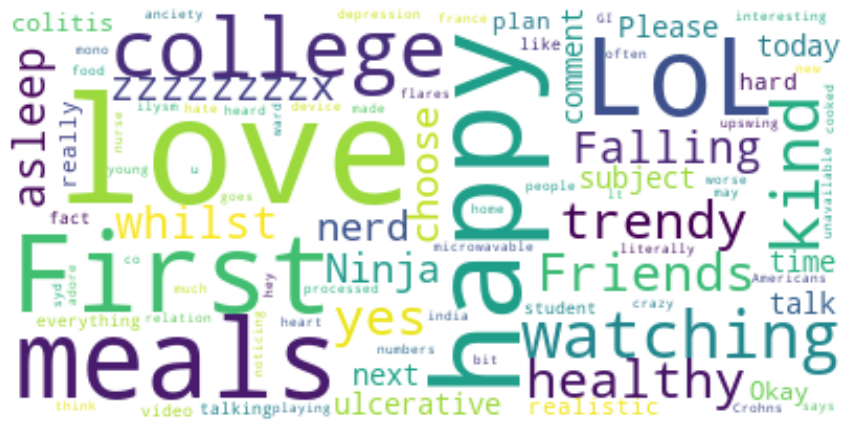

In [33]:
# Create stopword list:
nltk.download('stopwords')
stopWords = set(stopwords.words('english'))

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopWords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
df.shape

(18, 10)

In [13]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\napop\AppData\Roaming\nltk_data...


VADER’s SentimentIntensityAnalyzer() takes in a string and returns a dictionary of scores in each of four categories:
negative
neutral
positive
compound (computed by normalizing the scores above
Let us analyze some random statements through our sentimental analyzer
a = 'This was a good movie.'

In [14]:
df['scores'] = df['comment'].apply(lambda comment: sid.polarity_scores(comment))

df.head()

,date_post,date_extraction,influencer,post_type,post_url,platform,comment,comment_likecount,replies,BU;;;;;;;;;,scores
41,2021-10-14,2021-12-15,JJ Medicine,VIDEO,https://www.youtube.com/watch?v=FwiaoKrdzx4,Youtube,I&#39;ve heard this often goes with anciety/ d...,0,I too had mono...ever since high Epstein bar l...,CS;;;;;,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp..."
51,2021-10-14,2021-12-15,JJ Medicine,VIDEO,https://www.youtube.com/watch?v=FwiaoKrdzx4,Youtube,Falling asleep whilst watching this....zzzzzzzzx,0,Coffee 😁😁,CS;;;;;;;;;,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp..."
56,2021-10-14,2021-12-15,JJ Medicine,VIDEO,https://www.youtube.com/watch?v=FwiaoKrdzx4,Youtube,Falling asleep whilst watching this....zzzzzzzzx,0,While?,CS;;;;;;;;;,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp..."
89,2021-11-22,2021-12-15,ninjanerdscience,VIDEO,https://www.youtube.com/watch?v=UJw2WUtHLIk,Youtube,Ninja nerd I&#39;m so happy that you choose th...,0,Ulcerative Colitis is next to be released! Hop...,CS;;;;;;;;,"{'neg': 0.068, 'neu': 0.622, 'pos': 0.31, 'com..."
96,"2021-11-22,2021-12-15,ninjanerdscience,VIDEO,h...",ad many other diseases. What&#39;s the word ...,as usual,"it&#39;""s hard to distinguish cause from effe...",it seems that substantial D3 supplementation ...,0,That’s interesting. I’m a nurse on a GI ward a...,it maybe causation,"it may be just me looking out for it.""""","CS"";;;;;;","{'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'comp..."


In [15]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,date_post,date_extraction,influencer,post_type,post_url,platform,comment,comment_likecount,replies,BU;;;;;;;;;,scores,compound
41,2021-10-14,2021-12-15,JJ Medicine,VIDEO,https://www.youtube.com/watch?v=FwiaoKrdzx4,Youtube,I&#39;ve heard this often goes with anciety/ d...,0,I too had mono...ever since high Epstein bar l...,CS;;;;;,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",-0.7783
51,2021-10-14,2021-12-15,JJ Medicine,VIDEO,https://www.youtube.com/watch?v=FwiaoKrdzx4,Youtube,Falling asleep whilst watching this....zzzzzzzzx,0,Coffee 😁😁,CS;;;;;;;;;,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",-0.1531
56,2021-10-14,2021-12-15,JJ Medicine,VIDEO,https://www.youtube.com/watch?v=FwiaoKrdzx4,Youtube,Falling asleep whilst watching this....zzzzzzzzx,0,While?,CS;;;;;;;;;,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",-0.1531
89,2021-11-22,2021-12-15,ninjanerdscience,VIDEO,https://www.youtube.com/watch?v=UJw2WUtHLIk,Youtube,Ninja nerd I&#39;m so happy that you choose th...,0,Ulcerative Colitis is next to be released! Hop...,CS;;;;;;;;,"{'neg': 0.068, 'neu': 0.622, 'pos': 0.31, 'com...",0.8303
96,"2021-11-22,2021-12-15,ninjanerdscience,VIDEO,h...",ad many other diseases. What&#39;s the word ...,as usual,"it&#39;""s hard to distinguish cause from effe...",it seems that substantial D3 supplementation ...,0,That’s interesting. I’m a nurse on a GI ward a...,it maybe causation,"it may be just me looking out for it.""""","CS"";;;;;;","{'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'comp...",0.4019


In [16]:
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df.head()

,date_post,date_extraction,influencer,post_type,post_url,platform,comment,comment_likecount,replies,BU;;;;;;;;;,scores,compound,comp_score
41,2021-10-14,2021-12-15,JJ Medicine,VIDEO,https://www.youtube.com/watch?v=FwiaoKrdzx4,Youtube,I&#39;ve heard this often goes with anciety/ d...,0,I too had mono...ever since high Epstein bar l...,CS;;;;;,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",-0.7783,neg
51,2021-10-14,2021-12-15,JJ Medicine,VIDEO,https://www.youtube.com/watch?v=FwiaoKrdzx4,Youtube,Falling asleep whilst watching this....zzzzzzzzx,0,Coffee 😁😁,CS;;;;;;;;;,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",-0.1531,neg
56,2021-10-14,2021-12-15,JJ Medicine,VIDEO,https://www.youtube.com/watch?v=FwiaoKrdzx4,Youtube,Falling asleep whilst watching this....zzzzzzzzx,0,While?,CS;;;;;;;;;,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",-0.1531,neg
89,2021-11-22,2021-12-15,ninjanerdscience,VIDEO,https://www.youtube.com/watch?v=UJw2WUtHLIk,Youtube,Ninja nerd I&#39;m so happy that you choose th...,0,Ulcerative Colitis is next to be released! Hop...,CS;;;;;;;;,"{'neg': 0.068, 'neu': 0.622, 'pos': 0.31, 'com...",0.8303,pos
96,"2021-11-22,2021-12-15,ninjanerdscience,VIDEO,h...",ad many other diseases. What&#39;s the word ...,as usual,"it&#39;""s hard to distinguish cause from effe...",it seems that substantial D3 supplementation ...,0,That’s interesting. I’m a nurse on a GI ward a...,it maybe causation,"it may be just me looking out for it.""""","CS"";;;;;;","{'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'comp...",0.4019,pos


In [17]:
pip install plotly

^C
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68724 sha256=fbdcb716973b89e929d313fcb0e06b36d10ea319c4945d3a88545015b1464f9a
  Stored in directory: c:\users\napop\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks
Note: you may need to restart the kernel to use updated packages.


In [19]:
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objects as go
import cufflinks as cf
init_notebook_mode(connected=True)

In [21]:
#labels
lab = df["comp_score"].value_counts().keys().tolist()
#values
val = df["comp_score"].value_counts().values.tolist()
trace = go.Pie(labels=lab, 
                values=val, 
                marker=dict(colors=['red']), 
                # Seting values to 
                hoverinfo="value"
              )
data = [trace]

In [22]:
layout = go.Layout(title="Sentiment Distribution")

In [23]:
fig = go.Figure(data = data,layout = layout)

In [24]:
iplot(fig)

In [25]:
# defining data
trace = go.Histogram(x=df['platform'],nbinsx=40,histnorm='percent')
data = [trace]
# defining layout
layout = go.Layout(title="platform Distribution")
# defining figure and plotting
fig = go.Figure(data = data,layout = layout)
iplot(fig)

In [26]:
# defining data
trace = go.Histogram(x=df['post_type'],nbinsx=40,histnorm='percent')
data = [trace]
# defining layout
layout = go.Layout(title="post_type Distribution")
# defining figure and plotting
fig = go.Figure(data = data,layout = layout)
iplot(fig)

In [27]:
# defining data
trace = go.Histogram(x=df['compound'],nbinsx=40,histnorm='percent')
data = [trace]
# defining layout
layout = go.Layout(title="compound Distribution")
# defining figure and plotting
fig = go.Figure(data = data,layout = layout)
iplot(fig)

In [34]:
pip install regex

Note: you may need to restart the kernel to use updated packages.


In [44]:
import numpy as np

In [45]:
from nltk.corpus import stopwords  #This allows to create individual objects from a bog of wordsfrom nltk.tokenize import word_tokenize

In [47]:
def limpiar_tokenizar(comment):
    '''
    Esta función limpia y tokeniza el comment en palabras individuales.
    El orden en el que se va limpiando el comment no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''
    
    # Se convierte todo el comment a minúsculas
    nuevo_comment = comment.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_comment = re.sub('http\S+', ' ', nuevo_comment)
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_comment = re.sub(regex , ' ', nuevo_comment)
    # Eliminación de números
    nuevo_comment = re.sub("\d+", ' ', nuevo_comment)
    # Eliminación de espacios en blanco múltiples
    nuevo_comment = re.sub("\\s+", ' ', nuevo_comment)
    # Tokenización por palabras individuales
    nuevo_comment = nuevo_comment.split(sep = ' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_comment = [token for token in nuevo_comment if len(token) > 1]
    
    return(nuevo_comment)

test = "Esto es 1 ejemplo de l'limpieza de6 comment  https://t.co/rnHPgyhx4Z @cienciadedatos #textmining"
print(test)
print(limpiar_tokenizar(comment=test))


Esto es 1 ejemplo de l'limpieza de6 comment  https://t.co/rnHPgyhx4Z @cienciadedatos #textmining
['esto', 'es', 'ejemplo', 'de', 'limpieza', 'de', 'comment', 'cienciadedatos', 'textmining']


In [48]:
# Se aplica la función de limpieza y tokenización a cada tweet
# ==============================================================================
df['comment_tokenizado'] = df['comment'].apply(lambda x: limpiar_tokenizar(x))
df[['comment', 'comment_tokenizado']].head()

,comment,comment_tokenizado
41,i&#39;ve heard this often goes with anciety/ d...,"[ve, heard, this, often, goes, with, anciety, ..."
51,falling asleep whilst watching thiszzzzzzzzx,"[falling, asleep, whilst, watching, thiszzzzzz..."
56,falling asleep whilst watching thiszzzzzzzzx,"[falling, asleep, whilst, watching, thiszzzzzz..."
89,ninja nerd i&#39;m so happy that you choose th...,"[ninja, nerd, so, happy, that, you, choose, th..."
96,that’s interesting i’m a nurse on a gi ward an...,"[that’s, interesting, i’m, nurse, on, gi, ward..."


In [51]:
# Unnest de la columna texto_tokenizado
# ==============================================================================
comment_tidy = df.explode(column='comment_tokenizado')
comment_tidy = comment_tidy.drop(columns='comment')
comment_tidy = comment_tidy.rename(columns={'comment_tokenizado':'token'})
comment_tidy.head(3)

,date_post,date_extraction,influencer,post_type,post_url,platform,comment_likecount,replies,BU;;;;;;;;;,scores,compound,comp_score,exc,queen,words,token
41,2021-10-14,2021-12-15,JJ Medicine,VIDEO,https://www.youtube.com/watch?v=FwiaoKrdzx4,Youtube,0,i too had mono...ever since high epstein bar l...,CS;;;;;,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",-0.7783,neg,0,0,20,ve
41,2021-10-14,2021-12-15,JJ Medicine,VIDEO,https://www.youtube.com/watch?v=FwiaoKrdzx4,Youtube,0,i too had mono...ever since high epstein bar l...,CS;;;;;,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",-0.7783,neg,0,0,20,heard
41,2021-10-14,2021-12-15,JJ Medicine,VIDEO,https://www.youtube.com/watch?v=FwiaoKrdzx4,Youtube,0,i too had mono...ever since high epstein bar l...,CS;;;;;,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",-0.7783,neg,0,0,20,this


In [54]:
# Palabras totales utilizadas por cada influencer
# ==============================================================================
print('--------------------------')
print('Palabras totales por post')
print('--------------------------')
comment_tidy.groupby(by='influencer')['token'].count()

--------------------------
Palabras totales por post
--------------------------


influencer
 as usual            31
JJ Medicine          29
ninjanerdscience     46
sydneyserena        168
Name: token, dtype: int64

In [55]:
# Palabras distintas utilizadas por cada autor
# ==============================================================================
print('----------------------------')
print('Palabras distintas por autor')
print('----------------------------')
comment_tidy.groupby(by='influencer')['token'].nunique()

----------------------------
Palabras distintas por autor
----------------------------


influencer
 as usual           29
JJ Medicine         23
ninjanerdscience    21
sydneyserena        75
Name: token, dtype: int64

In [56]:
# Palabras distintas utilizadas por cada autor
# ==============================================================================
print('----------------------------')
print('Palabras distintas por autor')
print('----------------------------')
comment_tidy.groupby(by='influencer')['token'].nunique()

----------------------------
Palabras distintas por autor
----------------------------


influencer
 as usual           29
JJ Medicine         23
ninjanerdscience    21
sydneyserena        75
Name: token, dtype: int64

In [58]:
# Top 5 palabras más utilizadas por cada comment
# ==============================================================================
comment_tidy.groupby(['influencer','token'])['token'] \
 .count() \
 .reset_index(name='count') \
 .groupby('influencer') \
 .apply(lambda x: x.sort_values('count', ascending=False).head(5))

influencer       token  count
influencer                                               
 as usual        19           as usual          of      3
                 0            as usual          an      1
                 15           as usual         new      1
                 27           as usual        with      1
                 26           as usual        ward      1
JJ Medicine      32        JJ Medicine      asleep      2
                 49        JJ Medicine      whilst      2
                 34        JJ Medicine     falling      2
                 48        JJ Medicine    watching      2
                 47        JJ Medicine          ve      2
ninjanerdscience 56   ninjanerdscience       first      4
                 67   ninjanerdscience        that      4
                 52   ninjanerdscience       about      2
                 63   ninjanerdscience      please      2
                 71   ninjanerdscience  ulcerative      2
sydneyserena     108      sydneyserena          is      8
                 114      sydneyserena        love      8
                 104      sydneyserena         how      6
                 78       sydneyserena         and      6
                 109      sydneyserena          it      5

In [59]:
# Obtención de listado de stopwords del inglés
# ==============================================================================
stop_words = list(stopwords.words('english'))
# Se añade la stoprword: amp, ax, ex
stop_words.extend(("amp", "xa", "xe"))
print(stop_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


En la tabla anterior puede observarse que los términos más frecuentes en todos los usuarios se corresponden con artículos, preposiciones, pronombres…, en general, palabras que no aportan información relevante sobre el texto. Ha estas palabras se les conoce como stopwords. Para cada idioma existen distintos listados de stopwords, además, dependiendo del contexto, puede ser necesario adaptar el listado. Por ejemplo, en la tabla anterior aparece el término amp que procede de la etiqueta html &amp. Con frecuencia, a medida que se realiza un análisis se encuentran palabras que deben incluirse en el listado de stopwords.

In [60]:
# Filtrado para excluir stopwords
# ==============================================================================
comment_tidy = comment_tidy[~(comment_tidy["token"].isin(stop_words))]

IndexError: index 3 is out of bounds for axis 0 with size 3

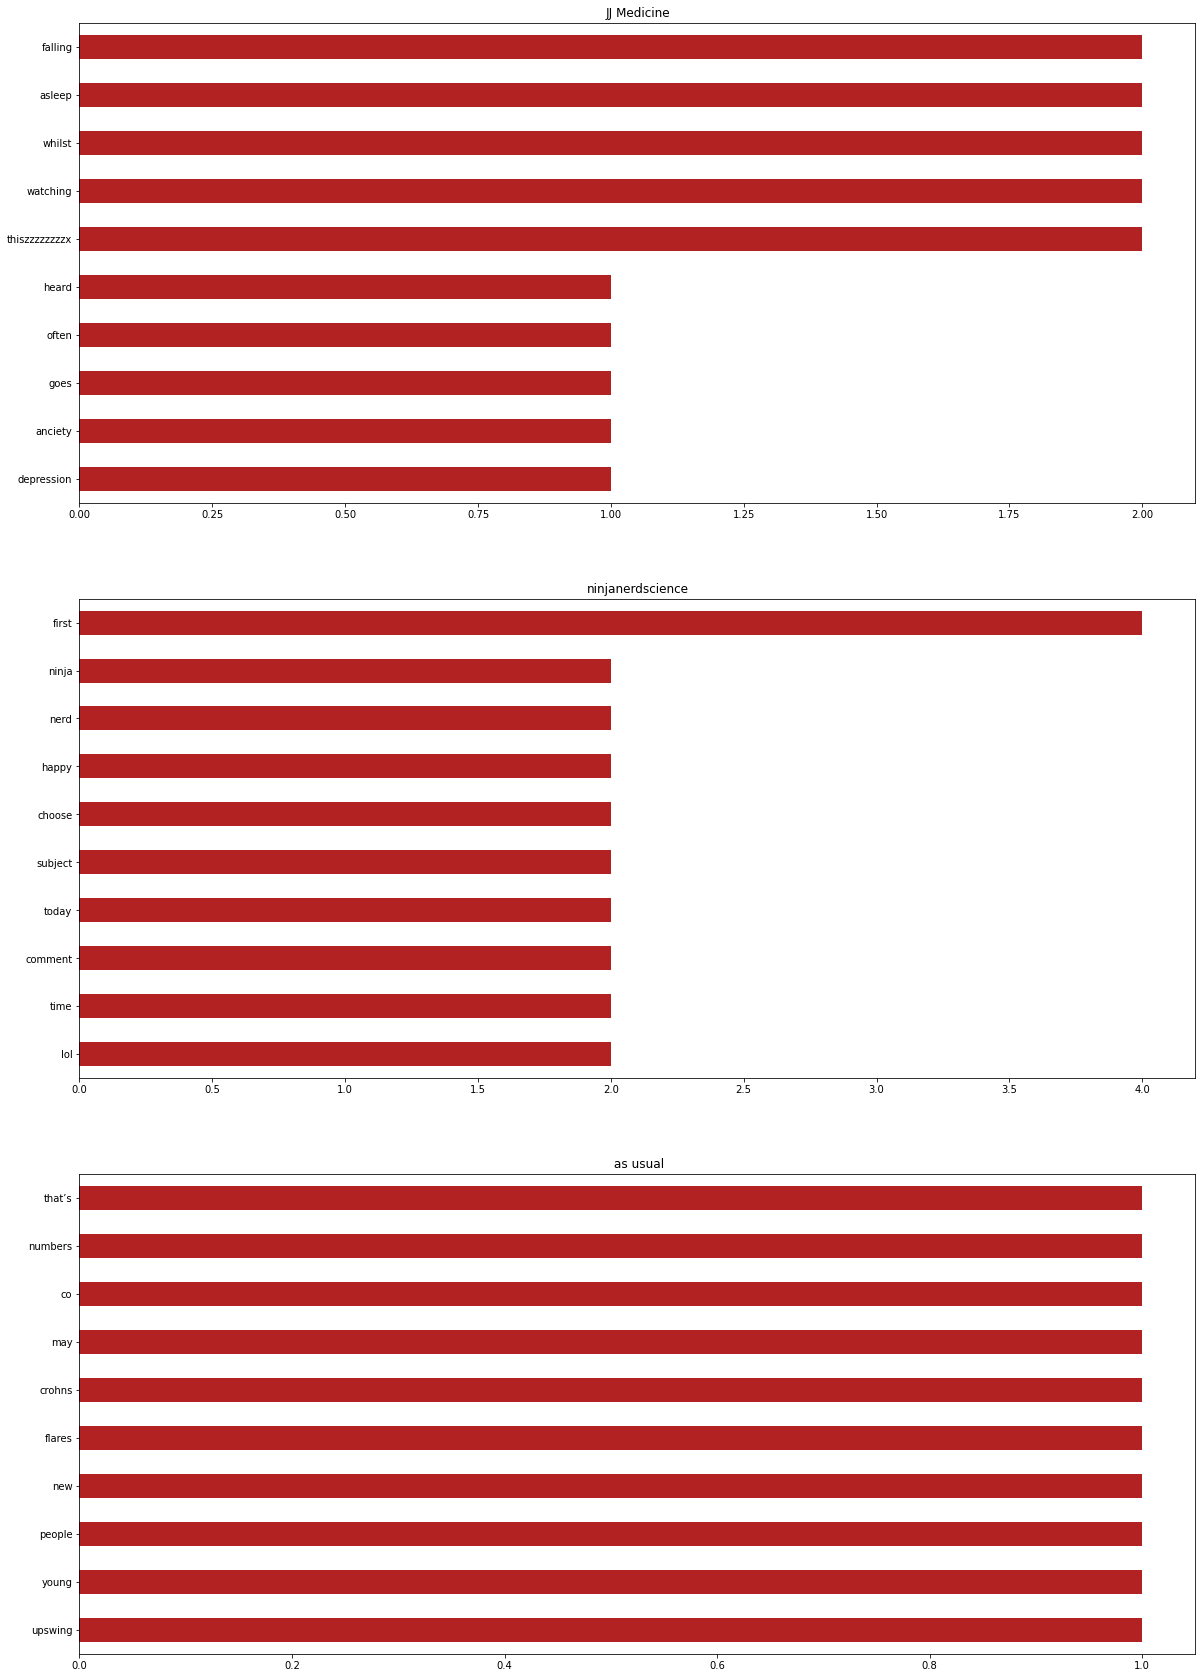

In [66]:

# Top 10 palabras por autor (sin stopwords)
# ==============================================================================
fig, axs = plt.subplots(nrows=3, ncols=1,figsize=(20, 30))
for i, autor in enumerate(comment_tidy.influencer.unique()):
    df_temp = comment_tidy[comment_tidy.influencer == autor]
    counts  = df_temp['token'].value_counts(ascending=False).head(10)
    counts.plot(kind='barh', color='firebrick', ax=axs[i])
    axs[i].invert_yaxis()
    axs[i].set_title(autor)

fig.tight_layout()
